# Cat vs Dog dataset

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-01-21 01:40:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   147MB/s    in 0.4s    

2021-01-21 01:40:42 (147 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile

# acessando os arquivos do sistema
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

# extraindo e fechando o arquivo
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

# separando os diretórios com dados de treino e dados de validação
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# diretório onde estão localizados as imagens de treinamento
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# diretório onde estão localizados as imagens de validação
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# listando os nomes das imagens utilizados como dados de treinamento
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

# visualizando os 10 primeiros nomes disponíveis nos dados de treinamento
print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.932.jpg', 'cat.948.jpg', 'cat.103.jpg', 'cat.369.jpg', 'cat.290.jpg', 'cat.89.jpg', 'cat.761.jpg', 'cat.324.jpg', 'cat.275.jpg', 'cat.720.jpg']
['dog.903.jpg', 'dog.546.jpg', 'dog.701.jpg', 'dog.634.jpg', 'dog.107.jpg', 'dog.24.jpg', 'dog.828.jpg', 'dog.234.jpg', 'dog.60.jpg', 'dog.729.jpg']


In [ ]:
# visualizando a quantidade dos exemplos treináveis e de validação
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

total training cats images: 1000
total training dogs images: 1000
total validation cats images: 500
total validation dogs images: 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# configurando os parâmetros de dimensão da visualização gráfica
nrows = 4
ncols = 4

pic_index = 0 # indíce para iterar sobre as imagens

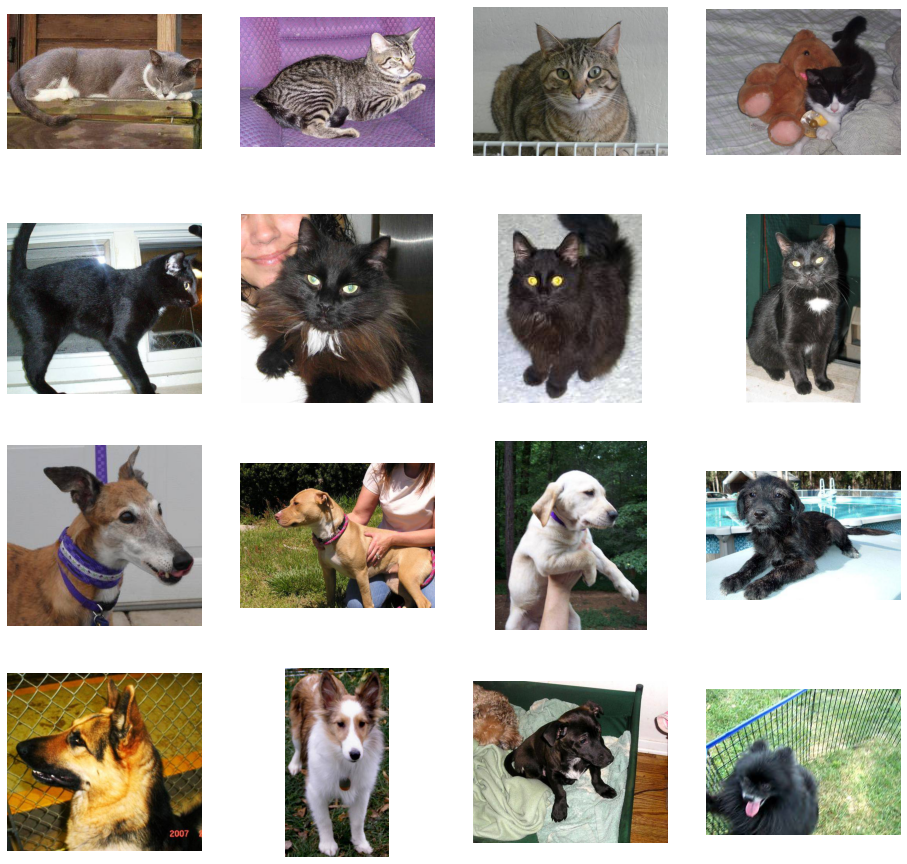

In [ ]:
# comfigurando matplotlib fig, definindo as dimensões das imagens para (4x4)
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # configurando o subplot; índice de subplot começa em 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # não mostra as grades do gráfico

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# importando o framework tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
# criando um modelo de rede neural convolucional
model = tf.keras.models.Sequential([
  # definindo o padrão de entrada das imagens como (150, 150, 3)
  # primeira camada de convolução
  tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = tf.nn.relu, input_shape = (150, 150, 3)),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
  # segunda camada de convolução
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
  # terceira camada de convolução
  tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
  # transformando as imagens em um único vetor de características
  tf.keras.layers.Flatten(),
  # camada oculta da rede
  tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
  # camada de saída da rede 
  tf.keras.layers.Dense(units = 1, activation = tf.nn.sigmoid)
])

In [ ]:
# sumarizando o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
# definindo os hiperparâmetros da rede
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# normalizando as imagens
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
# fluxo de processamento nas imagens de treinamento
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

# fluxo de processamento nas imagens de validação
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# treinando o algoritmo
history = model.fit(train_generator, validation_data = validation_generator,
                    steps_per_epoch = 100,
                    epochs = 15,
                    validation_steps = 50,
                    verbose = 1
                    )

Epoch 1/15
100/100 - 56s - loss: 0.7376 - accuracy: 0.5030 - val_loss: 0.6923 - val_accuracy: 0.5010
Epoch 2/15
100/100 - 55s - loss: 0.6802 - accuracy: 0.5590 - val_loss: 0.6607 - val_accuracy: 0.6270
Epoch 3/15
100/100 - 54s - loss: 0.6371 - accuracy: 0.6450 - val_loss: 0.5936 - val_accuracy: 0.6960
Epoch 4/15
100/100 - 54s - loss: 0.5501 - accuracy: 0.7180 - val_loss: 0.5963 - val_accuracy: 0.6920
Epoch 5/15
100/100 - 54s - loss: 0.4655 - accuracy: 0.7800 - val_loss: 0.5866 - val_accuracy: 0.7220
Epoch 6/15
100/100 - 54s - loss: 0.3773 - accuracy: 0.8305 - val_loss: 0.5867 - val_accuracy: 0.7260
Epoch 7/15
100/100 - 54s - loss: 0.2628 - accuracy: 0.8910 - val_loss: 0.6697 - val_accuracy: 0.7410
Epoch 8/15
100/100 - 54s - loss: 0.1655 - accuracy: 0.9380 - val_loss: 0.9191 - val_accuracy: 0.7170
Epoch 9/15
100/100 - 54s - loss: 0.1106 - accuracy: 0.9595 - val_loss: 1.0819 - val_accuracy: 0.7230
Epoch 10/15
100/100 - 54s - loss: 0.0813 - accuracy: 0.9720 - val_loss: 1.1097 - val_accura

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


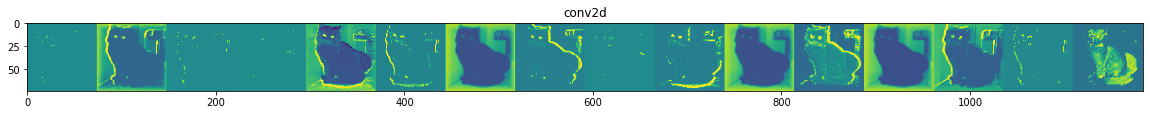

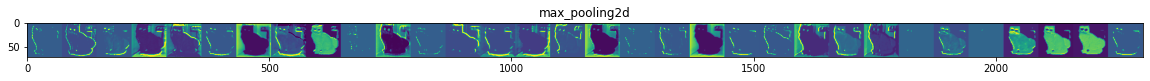

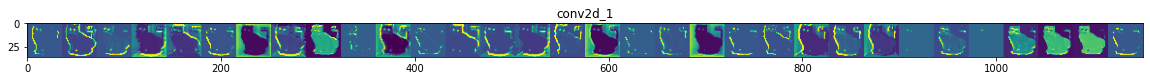

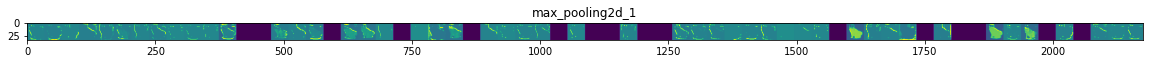

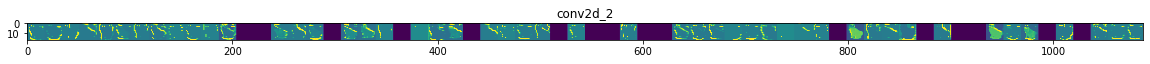

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

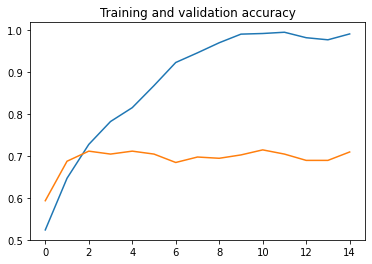

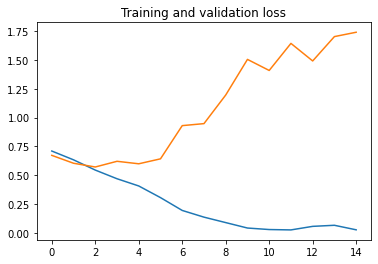

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )